In [4]:
import numpy as np 
import transformers 
import torch
import matplotlib.pyplot as plt
from transformers import GPT2Model, GPT2Tokenizer
import os
import re

In [28]:

# loading all the text in text data folder
text_sentences = []

for file in os.listdir('../Text data'):
    if file.endswith(".txt"):
        with open(os.path.join('../Text data', file), 'r') as f:
            text = f.read()
            text = re.sub(r'\n', ' ', text)  # Remove newline characters
            text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces

            # Split the textcorpus into a list of sentence strings
            text = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
            text_sentences.extend(text)
len(text_sentences)

65019

In [6]:
# Load pre-trained model tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Load pre-trained model
model = GPT2Model.from_pretrained("gpt2")

In [45]:
# text = "Hello, world! This is a test email. I hope you are doing well."
text = text_sentences[:11]

In [46]:
# Encode text to get token ids
inputids = tokenizer.encode(text, truncation= True, max_length= 1024, return_tensors="pt")

In [47]:
inputids.shape

torch.Size([1, 11])

In [48]:
# Get the embeddings for the input ids
with torch.no_grad():
    outputs = model(inputids)

outputs[0].shape

torch.Size([1, 11, 768])

In [49]:
# Unpack the output tuple to get the last_hidden_state
last_hidden_state = outputs[0]
# Extract the embeddings for the last token
lastwordembeddings = last_hidden_state[0, -4:] 
lastwordembeddings.shape

torch.Size([4, 768])

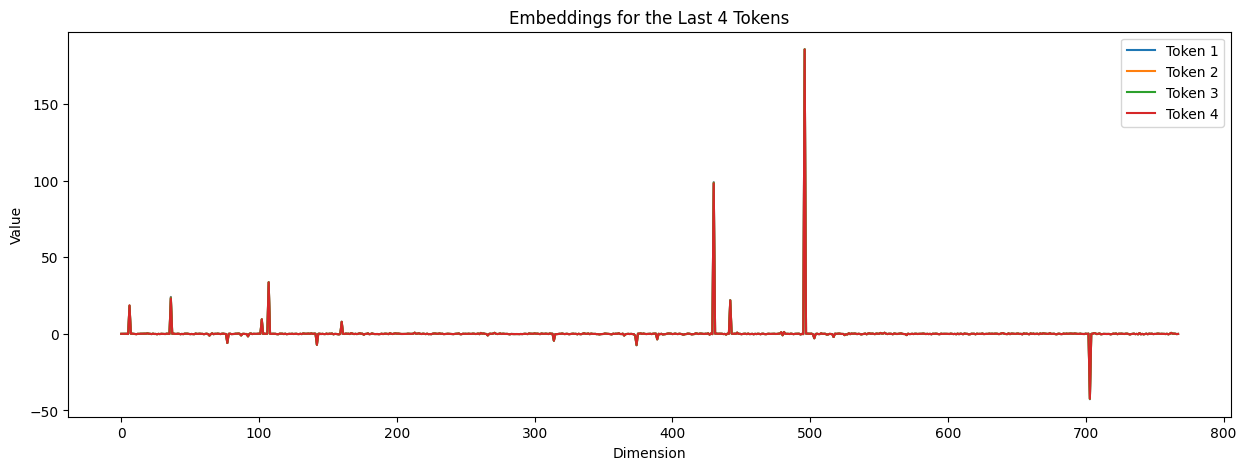

In [50]:
# Convert lastwordembeddings to numpy for easier manipulation
embeddings_np = lastwordembeddings.numpy()

# Plotting
plt.figure(figsize=(15, 5))
for i in range(embeddings_np.shape[0]):
    plt.plot(embeddings_np[i], label=f'Token {i+1}')
plt.title('Embeddings for the Last 4 Tokens')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()